In [1]:
import torch
from torch_geometric.data import Data
import numpy as np
import networkx as nx
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import matplotlib.pyplot as plt
import scipy.special as SS
import scipy.stats as SSA
import math

In [2]:
%run ../codes/branchingv1.py

In [7]:
s = '98'
s = int(s) ## parameter index
es_idx = 1 ## ensemble index
    ## load data
WN = np.loadtxt('W_avg.csv')
pop = np.loadtxt('pop_new.csv')
para_dict = np.load('para_dict.npy',allow_pickle=True)
## set parameters
para_i = para_dict[s]
R0 = para_i['R0']
r = para_i['r']
p = r/(R0+r)
print(r)

num_fips = len(pop)
T = 60
# num_ens = 100 ##300 ###500 intially when R0 gets larger, we need fewer ensemble members, std is smaller

# pathogen characteristics
Z = 3 # latent period
Zb = 1 # scale parameter for Z
D = 5 # infectious period
Db = 1 # scale parameter for b
alpha = 0.1 # reporting rate 10%

#initialize variables
# seeding
l0 = 1859-1 # start with New York County NY in python -1, in matlab is 1859
i0 = 100 ## the starting t=0, in matlab it is 1


p = r/(R0+r)

# weights = np.zeros(x_cutoff)
# for i in range(x_cutoff):
#     temp1=SS.gamma(r+i)/SS.gamma(r)/SS.gamma((i+1))*np.power(p,r)*np.power((1-p),i)
#     weights[i] = temp1
# weights_n = weights/np.sum(weights)

# x_cutoff = 100
# weights = []
# for i in range(x_cutoff):
#     temp1 = (math.gamma(r + i) / math.gamma(r) / math.gamma(i + 1)) * (p**r) * ((1 - p)**i)
#     weights.append(temp1)

# weights = np.array(weights)  # Convert list to numpy array

#Normalize weights (make them sum up to 1)
# weights_n = weights/weights.sum()
pmf = SSA.nbinom.pmf(range(300), r, p)
weights_n = pmf / np.sum(pmf)

save_dir = '/rds/general/user/qy1815/ephemeral/branching_R0-{}_r-{}/' .format(np.round(R0,2),np.round(r,3))

ss = np.random.SeedSequence(es_idx)
E_NewInf_i, E_TotInf_i = superspreading_T_Loc(T,num_fips,(l0,i0),weights_n,pop,(Z,Zb,D,Db),WN)
# E_NewInf[:,:] = E_NewInf_i[:,:T]
# E_TotInf[:,:] = E_TotInf_i[:,:T]

# f = gzip.GzipFile(save_dir+"NewInf_R0-{}_r-{}_{}.npy.gz" .format(np.round(R0,2),np.round(r,3),es_idx), "w")
# np.save(file=f, arr=E_NewInf)
# f.close()

0.025


In [8]:
infec_perpop = E_NewInf_i/pop[:,None]*100000
county_ode = np.sum(infec_perpop>10,axis=0)

In [10]:
county_ode[:60]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  2,  2,  3,  4,  5,  4,  5,  7,  7,  8, 10, 10,
       13, 17, 21, 22, 22, 22, 24, 26, 27, 28, 28, 30, 30, 30, 31, 32, 33,
       33, 34, 36, 40, 44, 45, 47, 46, 50])

In [6]:
# county_ode[:60]
county_ode_cutoff100 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 1, 2, 3, 2, 2, 2, 3, 4, 4, 5, 5, 7, 6, 9])

In [11]:
county_ode_cutoff300 = np.array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  2,  2,  3,  4,  5,  4,  5,  7,  7,  8, 10, 10,
       13, 17, 21, 22, 22, 22, 24, 26, 27, 28, 28, 30, 30, 30, 31, 32, 33,
       33, 34, 36, 40, 44, 45, 47, 46, 50])

In [18]:
cpp_results = np.loadtxt('ss_100.txt')
cpp_results_n = cpp_results/np.sum(cpp_results)

In [20]:
cpp_results_n[:10]

array([0.89615198, 0.02218201, 0.01125575, 0.00752238, 0.00563248,
       0.00448925, 0.00372252, 0.0031723 , 0.0027581 , 0.00243496])

In [79]:
ss_100_n = np.loadtxt('ss_100_n.txt')

In [80]:
ss_100_n = ss_100_n/np.sum(ss_100_n)

In [81]:
random_samples = np.random.choice(len(ss_100_n), size=1000000, p=ss_100_n) 

In [83]:
2.5/np.mean(random_samples)

1.6205091639793223

In [12]:
cpp_results = np.loadtxt('ss.txt')
cpp_results_n = cpp_results/np.sum(cpp_results)

In [16]:
cpp_results_n[:10]

array([0.89134161, 0.02206294, 0.01119533, 0.007482  , 0.00560224,
       0.00446516, 0.00370254, 0.00315528, 0.00274329, 0.00242189])

In [13]:
ss_300_n = np.loadtxt('ss_300_n.txt')

In [17]:
ss_300_n[:10]

array([0.891342  , 0.0220629 , 0.0111953 , 0.007482  , 0.00560224,
       0.00446515, 0.00370254, 0.00315528, 0.00274329, 0.00242188])

In [72]:
def mixed_distribution(lam, n, p):
    # Decide which distribution to sample from
    distribution_choice = np.random.choice(['poisson', 'negbin'], p=[0.8, 0.2])

    if distribution_choice == 'poisson':
        return SSA.poisson.rvs(lam)
    else: # 'negbin'
        return SSA.nbinom.rvs(n, p)

In [74]:
tt99 = np.zeros(10000)
for i in range(10000):
    tt99[i*1:(i+1)*1] = mixed_distribution(R0,r,p)

In [77]:
np.mean(tt99)

2.4478

In [75]:
tt1 = np.zeros(10000)
tt2 = np.zeros(10000)
# tt3 = np.zeros(10000)
for i in range(100):
    tt1[i*100:(i+1)*100] = np.random.choice(len(ss_100_n), size = 100 , p=ss_100_n)
    tt2[i*100:(i+1)*100] = np.random.choice(len(ss_300_n), size = 100 , p=ss_300_n)
#     tt3[i*1:(i+1)*1]  = SSA.nbinom.rvs(r, p, size=1,)

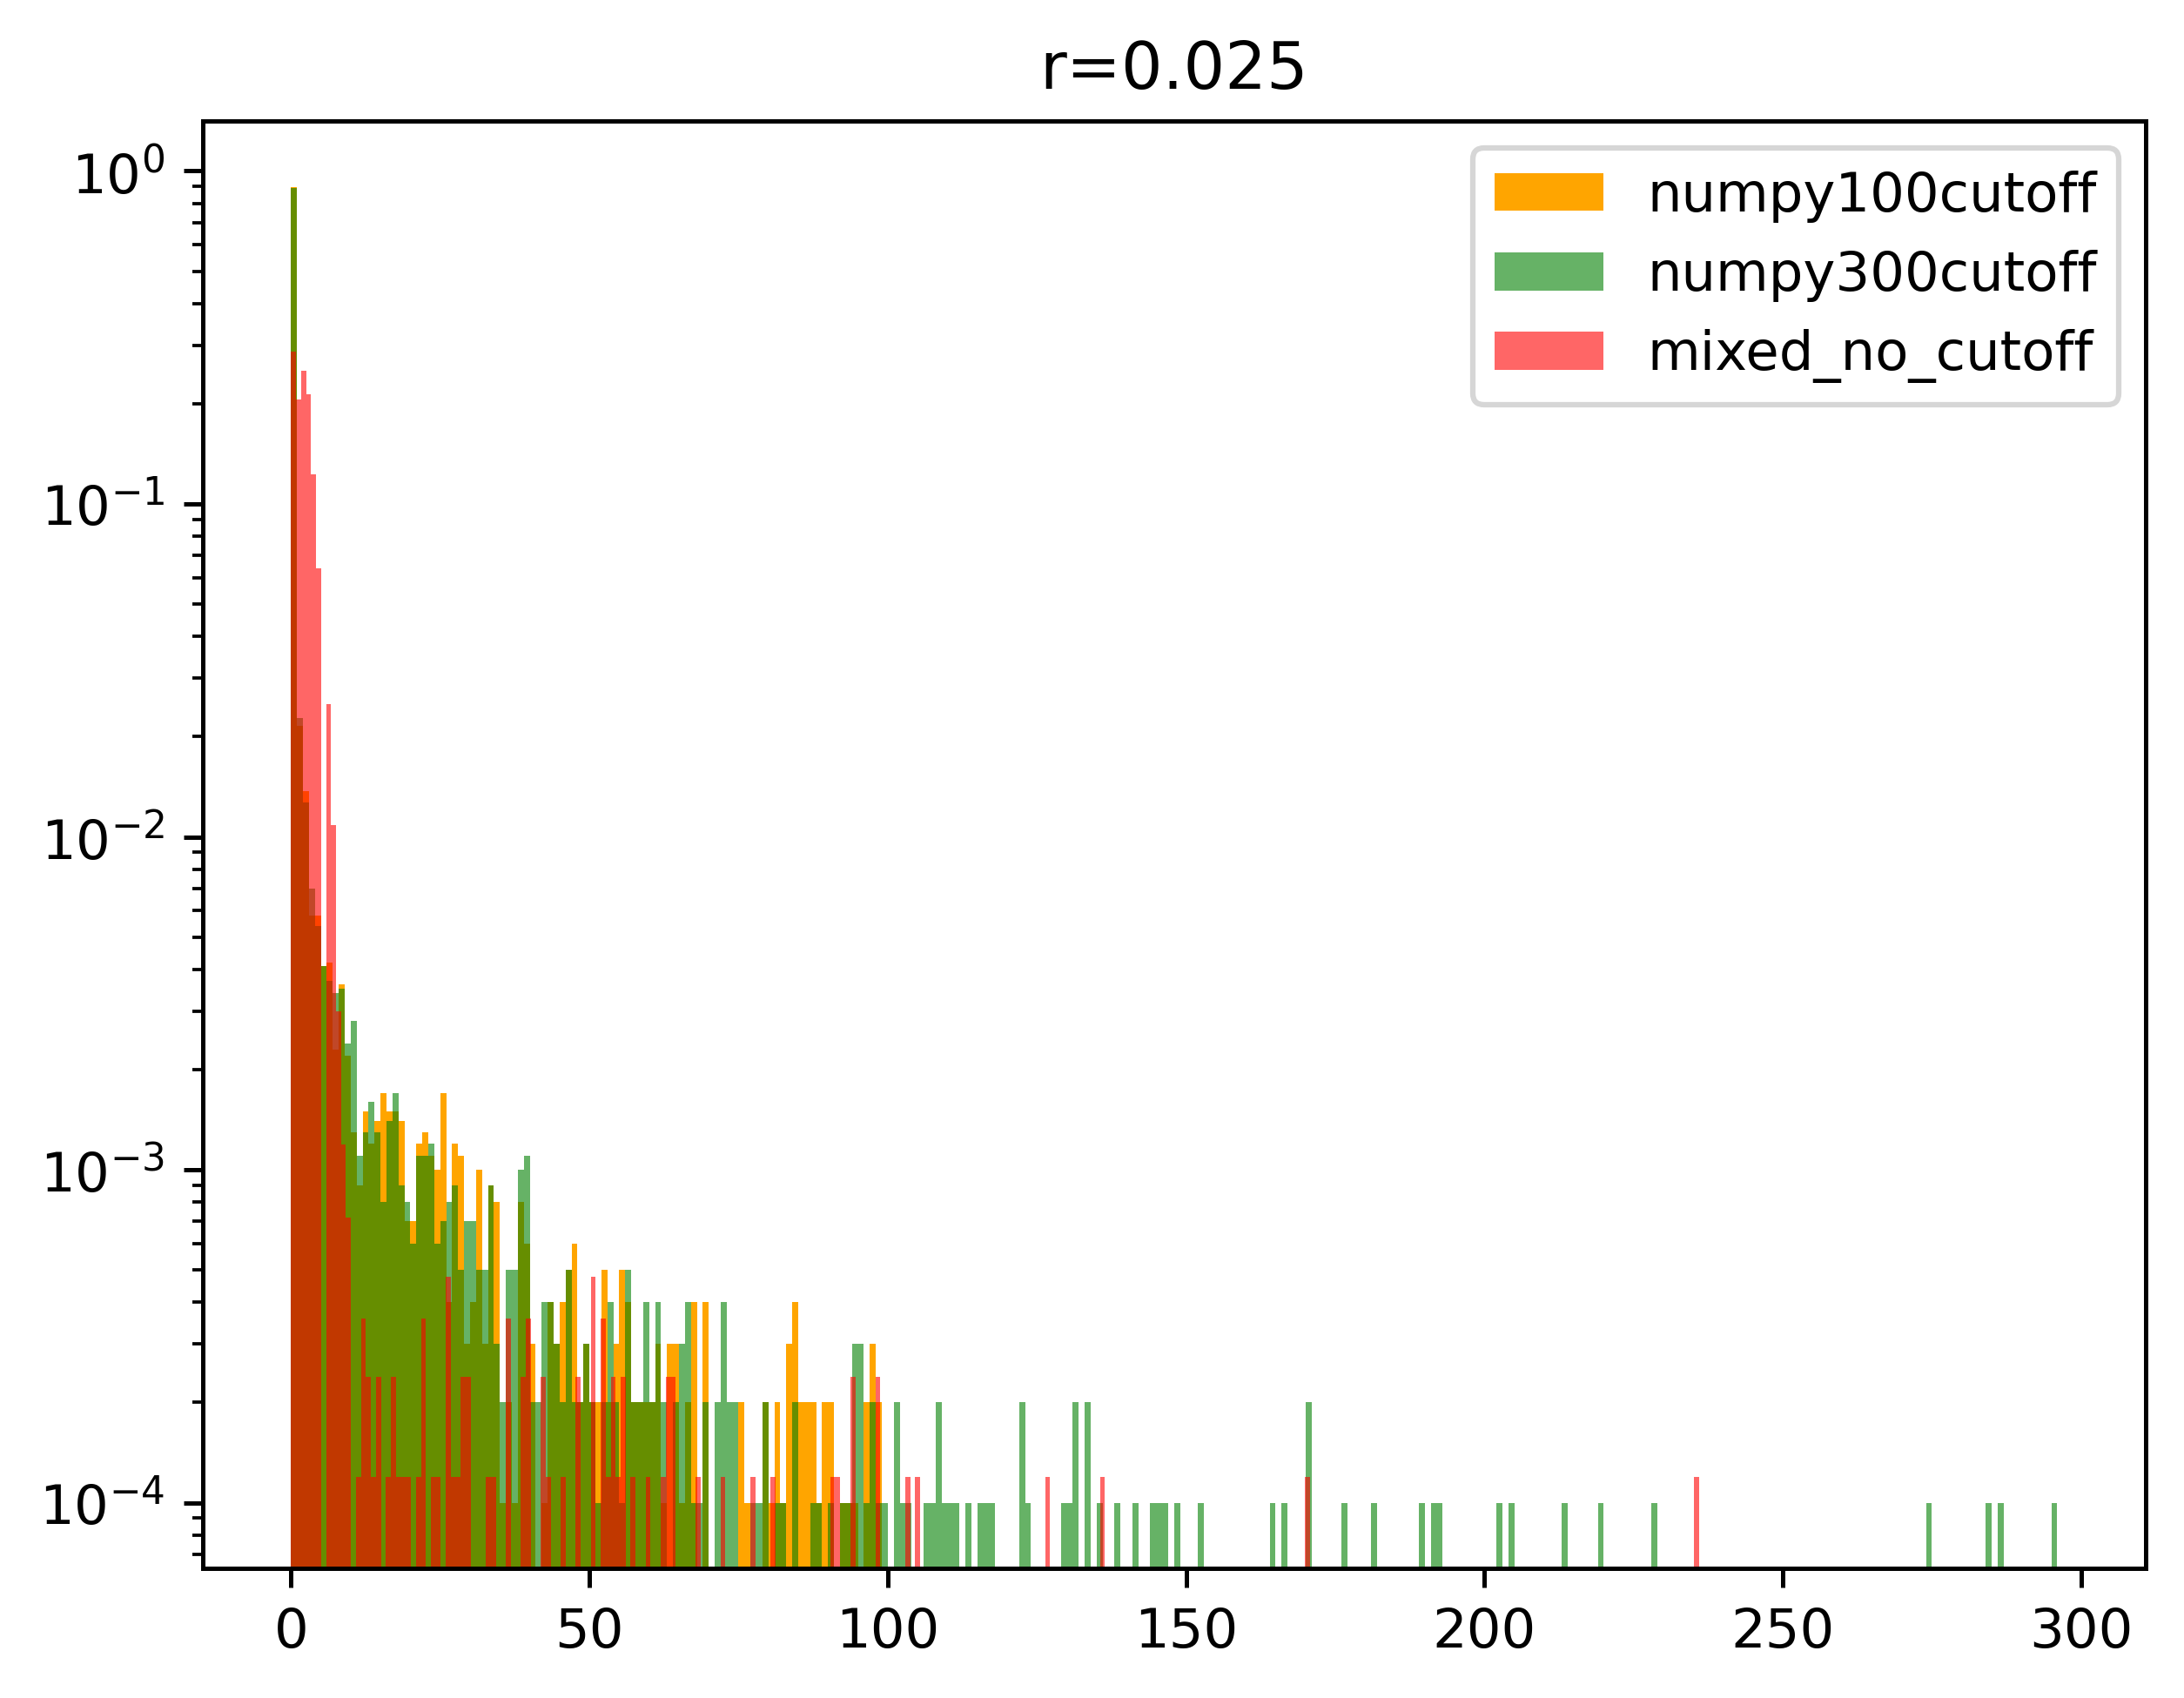

In [76]:
plt.figure(dpi=450)
plt.hist(tt1,density=True,bins=int(np.max(tt1)),color='orange',label='numpy100cutoff')
# plt.hist(gg1,density=True,bins=int(np.max(gg1)),color='blue',label='cpp_100',alpha=0.3)
plt.hist(tt2,density=True,bins=int(np.max(tt2)),color='green',label='numpy300cutoff',alpha=0.6)
# plt.hist(gg3,density=True,bins=int(np.max(gg3)),color='red',label='cpp_300',alpha=0.6)
plt.hist(tt99,density=True,bins=int(np.max(gg3)),color='red',label='mixed_no_cutoff',alpha=0.6)
# plt.hist(tt3,density=True,label='ssa',alpha=0.5,bins=int(np.max(tt3)))

# plt.plot(x,pmf,label='numpy',color='red',lw=2)
# plt.plot(np.arange(0,100,1),weights_n,label='create',alpha=0.8,lw=0.9,color='orange')
plt.legend()
# plt.xlim(-10,150)
# plt.ylim(-0.,0.02)
plt.title('r=0.025')
plt.yscale('log')

In [78]:
gg1 = np.loadtxt('cpp_nbio_100.txt')
gg3 = np.loadtxt('cpp_nbio_300.txt')

Text(0.5, 1.0, 'r=0.025')

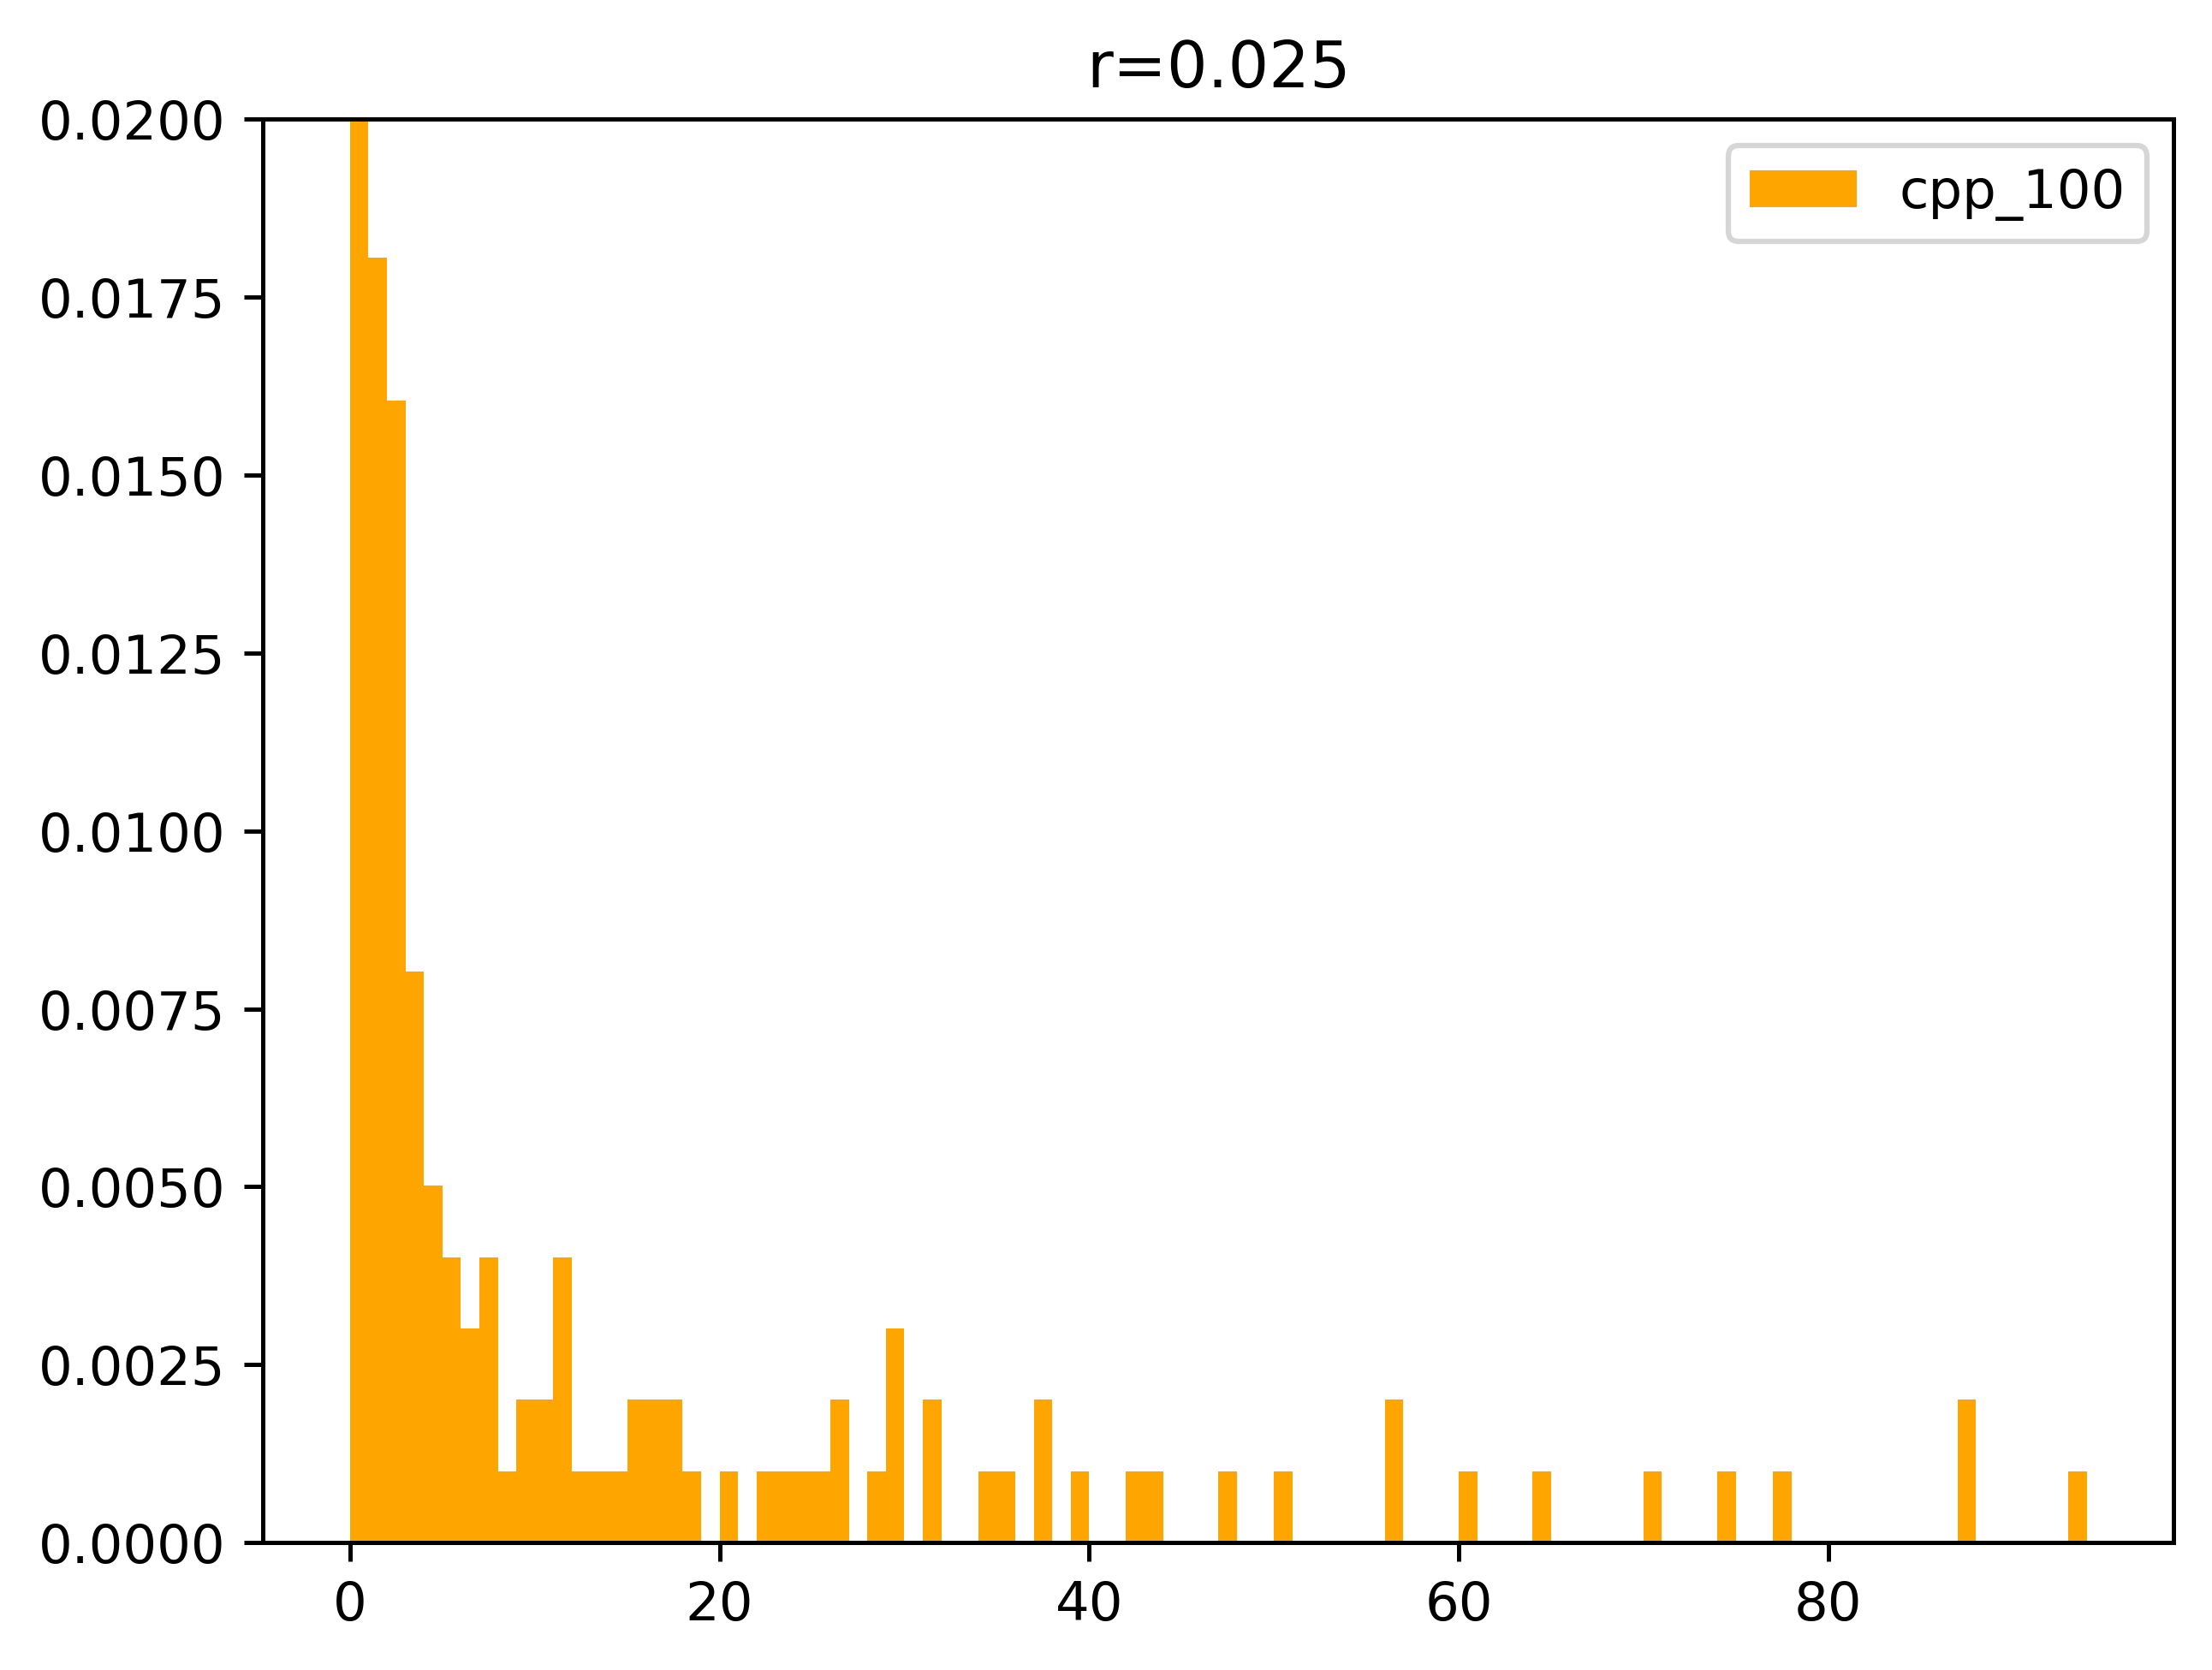

In [40]:
plt.figure(dpi=450)
plt.hist(gg1,density=True,bins=int(np.max(gg1)),color='orange',label='cpp_100')
# plt.hist(gg3,density=True,label='cpp_300',alpha=0.6,bins=int(np.max(gg3)),color='red')
# plt.hist(tt3,density=True,label='ssa',alpha=0.5,bins=int(np.max(tt3)))

# plt.plot(x,pmf,label='numpy',color='red',lw=2)
# plt.plot(np.arange(0,100,1),weights_n,label='create',alpha=0.8,lw=0.9,color='orange')
plt.legend()
# plt.xlim(-10,150)
plt.ylim(-0.,0.02)
plt.title('r=0.025')

In [212]:
tt1 = np.zeros(100*100)
tt2 = np.zeros(100*100)
tt3 = np.zeros(100*100)
for i in range(100000):
    tt1[i*1:(i+1)*1] = np.random.choice(len(cpp_results_n), size = 1 , p=cpp_results_n)
    rng = np.random.default_rng(i)
    tt2[i*1:(i+1)*1]  = rng.negative_binomial(r, p, 1)   
    tt3[i*1:(i+1)*1]  = SSA.nbinom.rvs(r, p, size=1,)

In [203]:
x = np.arange(SSA.nbinom.ppf(0.001, r, p),
              SSA.nbinom.ppf(0.999, r, p))  # define the range of x values
pmf = SSA.nbinom.pmf(x, r, p)  # calculate the probability mass function

In [214]:
np.mean(tt1)

2.4858

In [215]:
np.mean(tt2)

2.4701

Text(0.5, 1.0, 'r=0.025')

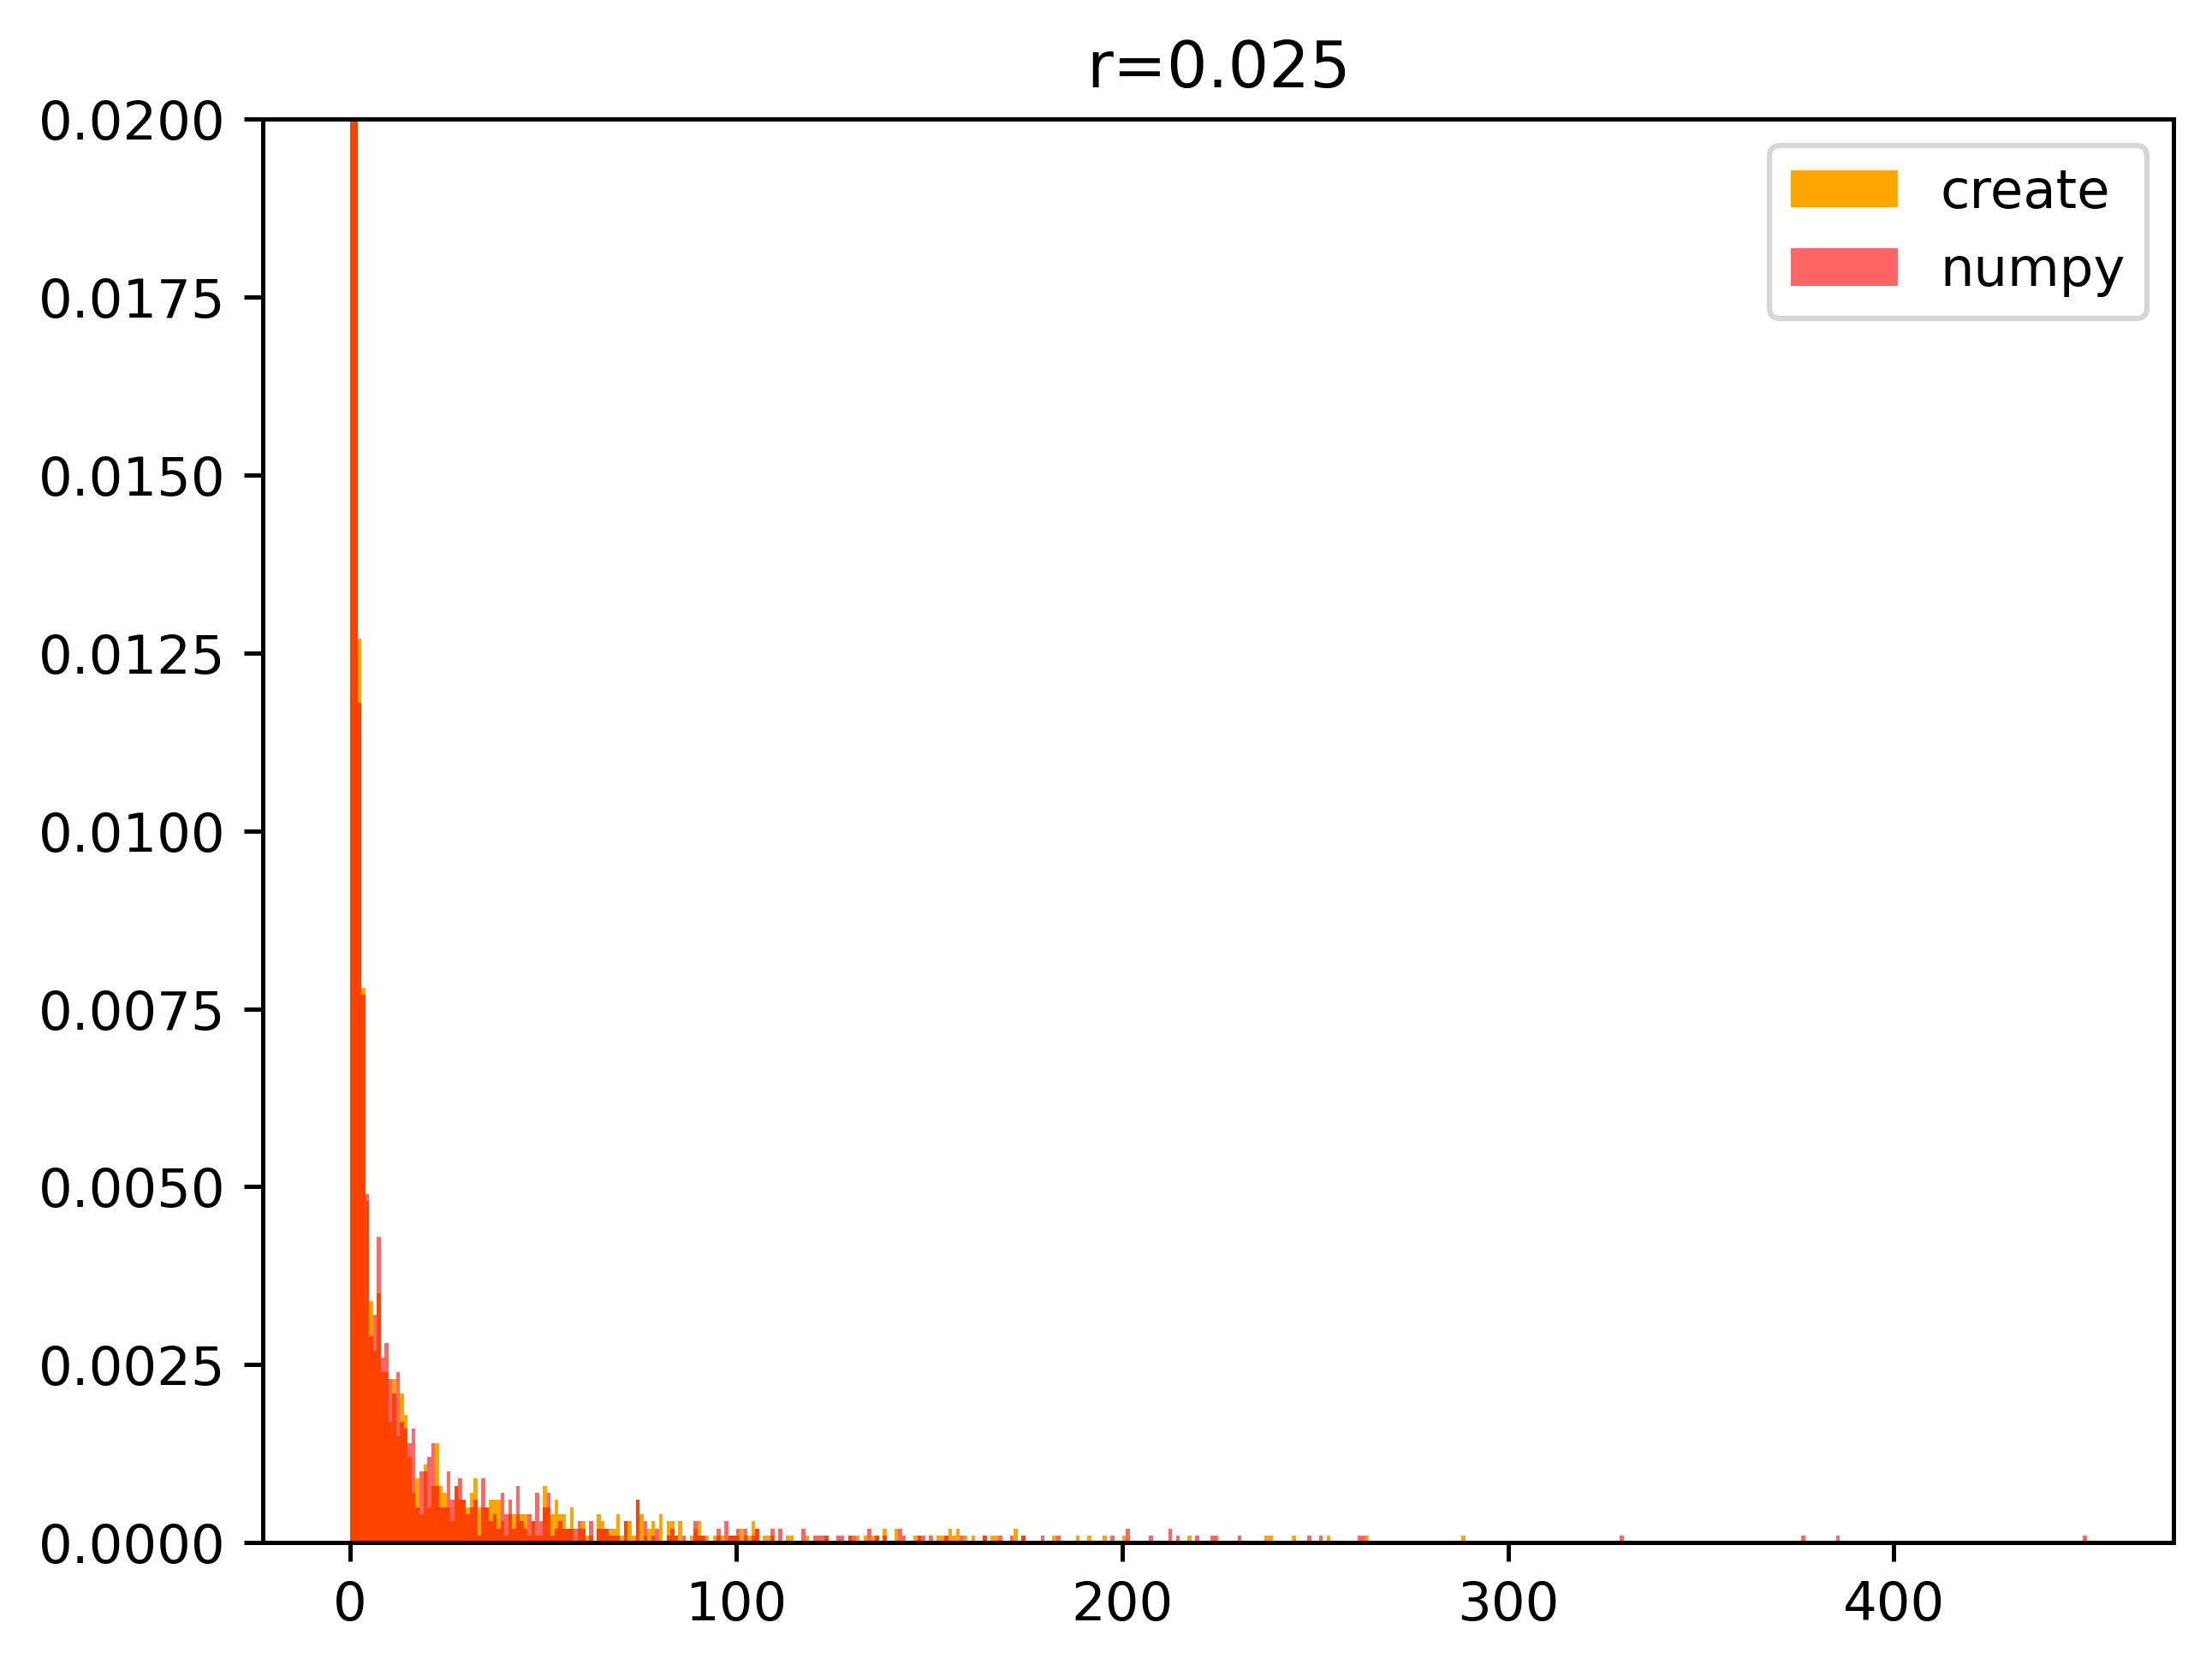

In [213]:
plt.figure(dpi=450)
plt.hist(tt1,density=True,bins=int(np.max(tt1)),color='orange',label='create')
plt.hist(tt2,density=True,label='numpy',alpha=0.6,bins=int(np.max(tt2)),color='red')
# plt.hist(tt3,density=True,label='ssa',alpha=0.5,bins=int(np.max(tt3)))

# plt.plot(x,pmf,label='numpy',color='red',lw=2)
# plt.plot(np.arange(0,100,1),weights_n,label='create',alpha=0.8,lw=0.9,color='orange')
plt.legend()
# plt.xlim(-10,150)
plt.ylim(-0.,0.02)
plt.title('r=0.025')

In [178]:
# cpp_results = np.loadtxt('ss.txt')
cpp_results11 = np.loadtxt('ss_100.txt')

In [179]:
# np.sum(cpp_results)
np.sum(cpp_results11)

0.9942833635

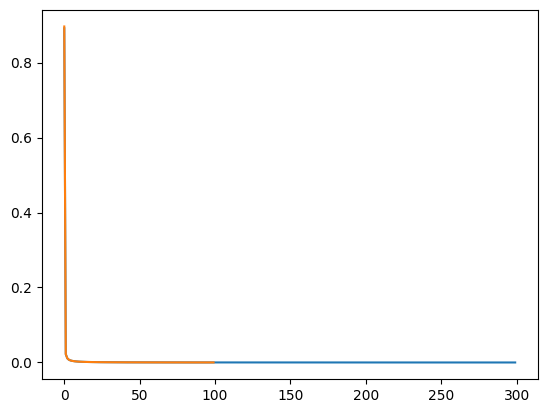

In [181]:
cpp_results_n = cpp_results/np.sum(cpp_results)
cpp_results11_n = cpp_results11/np.sum(cpp_results11)
plt.plot(range(300),cpp_results_n)
plt.plot(range(100),cpp_results11_n)

In [183]:
np.sum(cpp_results_n[:100] - cpp_results11_n)

-0.005367797830872447

In [186]:
weights_n - cpp_results11_n

array([ 8.92997577e-08, -2.46759828e-08, -3.64202270e-08, -3.22946907e-09,
       -4.08605584e-09, -3.75460367e-09,  1.09387236e-09, -6.18400089e-10,
        1.68420396e-09, -4.63723853e-09,  9.34866036e-10, -1.42412179e-09,
       -4.97988620e-09,  3.70428332e-09, -5.04137471e-09, -5.26449015e-09,
        3.04670001e-09, -1.54674186e-09,  4.31881769e-09, -1.64820972e-09,
       -3.37539666e-11, -3.41274809e-10,  9.19168020e-11,  1.38453755e-10,
       -5.32554583e-10, -9.14726845e-11, -2.51476364e-10, -2.16206965e-10,
        8.92801499e-11, -9.08995394e-11,  1.76810212e-10,  2.54035382e-10,
       -3.23588938e-10, -3.29929731e-10,  2.56456128e-10, -1.37247484e-10,
        3.59463815e-10,  3.52312552e-10, -1.98639397e-10, -1.71840022e-10,
       -3.15360245e-10, -9.49678360e-11, -4.52819229e-10, -4.27864829e-10,
        2.76589094e-10, -1.95125930e-10, -2.36182742e-10, -1.72317901e-10,
        4.34685310e-10, -5.11889250e-10,  1.54309670e-10, -4.19497463e-10,
       -2.35782273e-10,  